# Creación de boxplots con matplotlib y plotly

## MATPLOTLIB

In [3]:
import pandas as pd
#from myfuncs import db2df
import matplotlib.pyplot as plt
import numpy as np
from fun_calib23 import gs_days,db2df,rounds2023,obtiene_tzyvpd,calculaJs_VPD
from fun_calib23 import interpolar_dia,regresion,roundbox2023,df2box

In [4]:

DBTABLE='gs_irriwell2023'
#df=db2df(DBTABLE) 
#station=1
#tree=1
df=roundbox2023(DBTABLE,station=1,tree=1)

rounds = df.groupby('round').agg({'timestamp': 'mean', 'gsw': 'mean'}).reset_index()

rounds.head()
timestamps = pd.to_datetime(rounds["timestamp"])
tminutes = (timestamps - pd.Timestamp('1970-01-01')) // pd.Timedelta('1min')
tminutes = tminutes.astype(int)

tminutes=tminutes-tminutes[0]
#print(df)
df=df2box(df,"gsw","round") #Esto me genera una columna por cada ronda, necesario para el boxplot
#print(df)
df.columns=timestamps

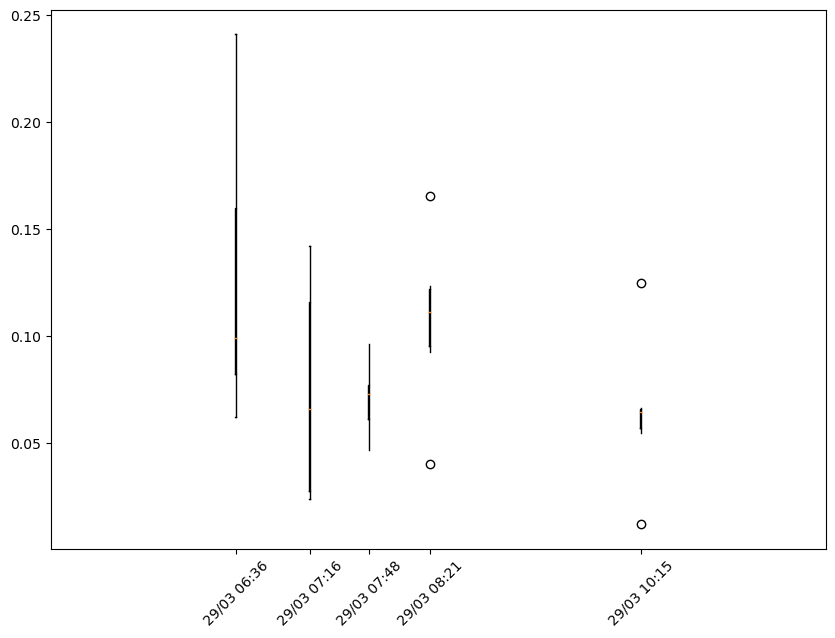

In [5]:
fig, ax = plt.subplots( figsize=(10,7) )
# Creating plot
df1=df.iloc[:,:5]
ax.boxplot( df1, vert=True, positions=tminutes[:5] )
xmin=tminutes[0]-100
xmax=tminutes[4]+100
ax.set_xlim(xmin, xmax)
labels=[t.strftime('%d/%m %H:%M') for t in df.columns]
plt.xticks(tminutes[:5], labels[:5],rotation=45 )
plt.show()


## PLOTLY

In [40]:
import plotly.graph_objects as go
import pandas as pd
import sf2gs_app.dfg2db as dfg
from datetime import datetime

#Read gs from DB and add round column to identify each round of repetitions
DBTABLE='gs_irriwell2023'
df=dfg.roundbox2023(DBTABLE,station=1,tree=1)
rounds = df.groupby('round').agg({'timestamp': 'mean', 'gsw': 'mean'}).reset_index()

rounds.head()
timestamps = pd.to_datetime(rounds["timestamp"])
tminutes = (timestamps - pd.Timestamp('1970-01-01')) // pd.Timedelta('1min')
tminutes = tminutes.astype(int)

tminutes=tminutes-tminutes[0]
df["roundtime"]=[tminutes[r] for r in df["round"]]

#Filtering by day:
df['date']=df['timestamp'].dt.date
days=sorted(list(set(df['date']))) #Days of measurement:
target_date=days[0]
received_date="01/08/2023"
target_date = datetime.strptime(received_date, '%d/%m/%Y').date()
dfp = df[df['date'] == target_date]

#dfp=df.query('date == @target_date')

rounds = df.groupby('round').agg({'timestamp': 'mean', 'gsw': 'mean'}).reset_index()
timestamps = pd.to_datetime(rounds["timestamp"])

In [41]:
dfp

,timestamp,gsw,date_time,timediff,round,roundtime,date
4986,2023-08-01 06:38:44,0.042618,2023-08-01 06:38:44,6 days 19:09:33,52,180003,2023-08-01
4987,2023-08-01 06:38:50,0.106376,2023-08-01 06:38:50,0 days 00:00:06,52,180003,2023-08-01
4988,2023-08-01 06:38:57,0.134966,2023-08-01 06:38:57,0 days 00:00:07,52,180003,2023-08-01
4989,2023-08-01 06:39:11,0.107583,2023-08-01 06:39:11,0 days 00:00:14,52,180003,2023-08-01
4990,2023-08-01 06:39:19,0.123437,2023-08-01 06:39:19,0 days 00:00:08,52,180003,2023-08-01
4991,2023-08-01 06:39:25,0.133093,2023-08-01 06:39:25,0 days 00:00:06,52,180003,2023-08-01
5082,2023-08-01 09:04:57,0.081457,2023-08-01 09:04:57,0 days 02:25:32,53,180149,2023-08-01
5083,2023-08-01 09:05:03,0.019944,2023-08-01 09:05:03,0 days 00:00:06,53,180149,2023-08-01
5084,2023-08-01 09:05:13,0.018354,2023-08-01 09:05:13,0 days 00:00:10,53,180149,2023-08-01
5085,2023-08-01 09:05:24,0.056705,2023-08-01 09:05:24,0 days 00:00:11,53,180149,2023-08-01


In [43]:
dfp["rounddate"] = dfp["round"].apply(lambda r: rounds["timestamp"].loc[r])
#dfp["rounddate"] = dfp["round"].apply(lambda r: rounds["timestamp"][r])
dfp["labels"] = dfp["rounddate"].apply(lambda t: t.strftime('%d/%m %H:%M'))
    
#dfp["rounddate"]=[rounds["timestamp"][r] for r in dfp["round"]]
#dfp["labels"]=[t.strftime('%d/%m %H:%M') for t in dfp["rounddate"]]

x_label = 'roundtime'
y_label = 'gsw'
#dfp=df.iloc[:36,:]
fig = go.Figure(data=go.Box(x=dfp[x_label], y=dfp[y_label]))
fig.update_layout(boxmode='overlay', width=800, height=500)
fig.update_layout(title="gs variability",title_x=0.5)

fig.update_xaxes(
    tickmode='array',
    tickvals=dfp[x_label],
    ticktext=dfp["labels"],
    tickangle=45,
    title_text="Date"
)
fig.update_yaxes(title_text="gs")
fig.show()

/var/folders/p0/_9x9k0js55d0v7h2bltslszm0000gn/T/ipykernel_19545/3343009713.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p0/_9x9k0js55d0v7h2bltslszm0000gn/T/ipykernel_19545/3343009713.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
import pandas as pd
import sf2gs_app.dfg2db as dfg
DBTABLE='gs_irriwell2023'
df=dfg.db2df(DBTABLE)
stations=list(set(df['irriwell']))

[1, 2, 3, 4]

In [33]:
[r for r in dfp['round']]

[12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17]

In [10]:
vdate

['2023', '06', '22']

In [12]:
df

,timestamp,gsw,date_time,timediff,round,roundtime,date,rounddate,labels
6,2023-03-29 06:35:59,0.241136,2023-03-29 06:35:59,NaT,0,0,2023-03-29,2023-03-29 06:36:50.833333248,29/03 06:36
7,2023-03-29 06:36:23,0.178329,2023-03-29 06:36:23,0 days 00:00:24,0,0,2023-03-29,2023-03-29 06:36:50.833333248,29/03 06:36
8,2023-03-29 06:36:44,0.104047,2023-03-29 06:36:44,0 days 00:00:21,0,0,2023-03-29,2023-03-29 06:36:50.833333248,29/03 06:36
9,2023-03-29 06:37:06,0.078347,2023-03-29 06:37:06,0 days 00:00:22,0,0,2023-03-29,2023-03-29 06:36:50.833333248,29/03 06:36
10,2023-03-29 06:37:20,0.094278,2023-03-29 06:37:20,0 days 00:00:14,0,0,2023-03-29,2023-03-29 06:36:50.833333248,29/03 06:36
...,...,...,...,...,...,...,...,...,...
5083,2023-08-01 09:05:03,0.019944,2023-08-01 09:05:03,0 days 00:00:06,53,180149,2023-08-01,2023-08-01 09:05:17.500000000,01/08 09:05
5084,2023-08-01 09:05:13,0.018354,2023-08-01 09:05:13,0 days 00:00:10,53,180149,2023-08-01,2023-08-01 09:05:17.500000000,01/08 09:05
5085,2023-08-01 09:05:24,0.056705,2023-08-01 09:05:24,0 days 00:00:11,53,180149,2023-08-01,2023-08-01 09:05:17.500000000,01/08 09:05
5086,2023-08-01 09:05:31,0.045809,2023-08-01 09:05:31,0 days 00:00:07,53,180149,2023-08-01,2023-08-01 09:05:17.500000000,01/08 09:05


In [20]:
target=pd.to_datetime('2023/06/14')
#df.query(f"date == {target}")
print(type(df["date"]))
print(type(df["date"].values[0]))

<class 'pandas.core.series.Series'>
<class 'datetime.date'>


In [21]:
fecha_concreta_str="14/06/2023"
fecha_concreta_formatted = pd.to_datetime(fecha_concreta_str, format='%d/%m/%Y').strftime('%Y-%m-%d')

# Filtra el DataFrame por la fecha concreta utilizando df.query()
df_filtrado = df.query('date == @fecha_concreta_formatted')

print(df_filtrado)


Empty DataFrame
Columns: [timestamp, gsw, date_time, timediff, round, roundtime, date, rounddate, labels]
Index: []


In [27]:
df.iloc[100,:]

timestamp           2023-06-14 08:48:35
gsw                            0.088151
date_time           2023-06-14 08:48:35
timediff                0 days 00:00:06
round                                16
roundtime                        111012
date                         2023-06-14
rounddate    2023-06-14 08:48:23.500000
labels                      14/06 08:48
Name: 1543, dtype: object

In [23]:
df.iloc[100,:]

timestamp           2023-06-14 08:48:35
gsw                            0.088151
date_time           2023-06-14 08:48:35
timediff                0 days 00:00:06
round                                16
roundtime                        111012
date                         2023-06-14
rounddate    2023-06-14 08:48:23.500000
labels                      14/06 08:48
Name: 1543, dtype: object

In [29]:
from datetime import datetime

fecha_concreta = datetime.strptime(fecha_concreta_str, '%d/%m/%Y').date()

# Filtra el DataFrame por la fecha concreta
df_filtrado = df[df['date'] == fecha_concreta]

fecha_concreta

datetime.date(2023, 6, 14)

In [54]:
import plotly.graph_objects as go
import pandas as pd
import sf2gs_app.dfg2db as dfg
from datetime import datetime

#Read gs from DB and add round column to identify each round of repetitions
DBTABLE='gs_irriwell2023'
df=dfg.roundbox2023(DBTABLE,station=1,tree=2)
df

,timestamp,gsw,date_time,timediff,round
18,2023-03-29 06:40:41,0.255044,2023-03-29 06:40:41,NaT,0
19,2023-03-29 06:41:19,0.129455,2023-03-29 06:41:19,0 days 00:00:38,0
20,2023-03-29 06:41:36,0.166496,2023-03-29 06:41:36,0 days 00:00:17,0
21,2023-03-29 06:41:57,NaN,2023-03-29 06:41:57,0 days 00:00:21,0
22,2023-03-29 06:42:07,NaN,2023-03-29 06:42:07,0 days 00:00:10,0
...,...,...,...,...,...
5095,2023-08-01 09:06:59,0.016924,2023-08-01 09:06:59,0 days 00:00:07,53
5096,2023-08-01 09:07:06,0.013245,2023-08-01 09:07:06,0 days 00:00:07,53
5097,2023-08-01 09:07:18,0.046982,2023-08-01 09:07:18,0 days 00:00:12,53
5098,2023-08-01 09:07:27,0.041748,2023-08-01 09:07:27,0 days 00:00:09,53
